## 1.

In [24]:
x = [1.31, 1.93]
y = [3.24, 4.76]

# Usamos el método A
Resul = (x[0] * y[1] - x[1] * y[0]) / (y[1] - y[0])

# Redondeamos 6 cifras significativas
Resul = round(Resul, 6)

print("El valor de x es:", Resul)

El valor de x es: -0.011579


### Método A

In [27]:
# Cálculo usando el Método A
x_a = (x[0] * y[1] - x[1] * y[0]) / (y[1] - y[0])

# Valor esperado y cálculo del error relativo
x_esp = -0.0197
error_a = abs((x_a - x_esperado) / x_esperado)

# Redondeo a 3 cifras
x_a = round(x_a, 3)
error_a = round(error_a, 3)

print("x =", x_a)
print("Error relativo =", error_a)


x = -0.012
Error relativo = 0.412


### Método B

In [4]:
x_b = x[0] - ((x[1] - x[0]) * y[0]) / (y[1] - y[0])

# Valor esperado y cálculo del error relativo
x_esperado = -0.0105
error_b = abs((x_b - x_esperado) / x_esperado)

# Redondeo a 3 cifras 
x_b = round(x_b, 3)
error_b = round(error_b, 3)

print("x =", x_b)
print("Error relativo =", error_b)

x = -0.012
Error relativo = 0.103


## 2.

In [11]:
pi_real = 3.14159

def arctan_approx(x):
    return x - (1/3) * x**3 + (1/5) * x**5

approximation = 4 * (arctan_approx(1/2) + arctan_approx(1/3))

epsilon = abs((approximation - pi_real) / pi_real)

epsilon_rounded = round(epsilon, 4)

print("ε =", epsilon_rounded)

ε = 0.0013


In [20]:
approximation = 16 * arctan_approx(1/5) - 4 * arctan_approx(1/239)

epsilon = abs((approximation - pi_real) / pi_real)

epsilon_rounded = round(epsilon, 8)

print("ε =", epsilon_rounded)

ε = 9.88e-06


## 3.

In [7]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    x_prev = x0
    x_curr = x1
    iter_count = 0
    
    f_prev = f(x_prev) 
    f_curr = f(x_curr)  
    
    while abs(f_curr) > tol and iter_count < max_iter:
        x_next = x_curr - f_curr * (x_curr - x_prev) / (f_curr - f_prev)
        
        x_prev = x_curr
        x_curr = x_next
        
        f_prev = f_curr  
        f_curr = f(x_curr)  
        
        iter_count += 1

    return x_curr, iter_count

### ejemplo 1

In [8]:
i = 0

def func(x):
    global i
    i += 1
    y = x**3 - 3 * x**2 + x - 1
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y


secant_method(func, x0=2, x1=3)

Llamada i=1	 x=2.00000	 y=-3.00
Llamada i=2	 x=3.00000	 y=2.00
Llamada i=3	 x=2.60000	 y=-1.10
Llamada i=4	 x=2.74227	 y=-0.20
Llamada i=5	 x=2.77296	 y=0.03
Llamada i=6	 x=2.76922	 y=-0.00
Llamada i=7	 x=2.76929	 y=-0.00
Llamada i=8	 x=2.76929	 y=0.00


(2.7692923542484045, 6)

### ejemplo 2

In [9]:
i = 0
import math


def func(x):
    global i
    i += 1
    y = math.sin(x) + 0.5
    print(f"Llamada i={i}\t x={x:.5f}\t y={y:.2f}")
    return y


secant_method(func, x0=2, x1=3)

Llamada i=1	 x=2.00000	 y=1.41
Llamada i=2	 x=3.00000	 y=0.64
Llamada i=3	 x=3.83460	 y=-0.14
Llamada i=4	 x=3.68602	 y=-0.02
Llamada i=5	 x=3.66399	 y=0.00
Llamada i=6	 x=3.66520	 y=-0.00
Llamada i=7	 x=3.66519	 y=-0.00


(3.66519143172732, 5)

## 4.

In [10]:
def f(x):
    return math.sin(x)

def bisection_method(a, b, tolerance=1e-6, max_iterations=100):
    if f(a) * f(b) > 0:
        return "Error [sin cambio de signo]"
    
    for i in range(max_iterations):
        c = (a + b) / 2
        if abs(f(c)) < tolerance:
            return c
        
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c
    
    return "Error [división para 0]"

# Casos de prueba
intervalos = [
    (-1, 2),
    (-4, 5),
    (3, 5),
    (-3.5, 3),
    (-5, 4),
    (-2.5, -1)
]

for i, (a, b) in enumerate(intervalos):
    resultado = bisection_method(a, b)
    print(f"Resultado para el intervalo a={a}, b={b}: {resultado}")

Resultado para el intervalo a=-1, b=2: -9.5367431640625e-07
Resultado para el intervalo a=-4, b=5: 3.141591787338257
Resultado para el intervalo a=3, b=5: 3.141592025756836
Resultado para el intervalo a=-3.5, b=3: Error [sin cambio de signo]
Resultado para el intervalo a=-5, b=4: -3.141591787338257
Resultado para el intervalo a=-2.5, b=-1: Error [sin cambio de signo]


## 5.

$x_0 = 3$

In [13]:
import math

# Definimos la función f(x) y su derivada f'(x)
def f(x):
    return x**3 - 3*x**2 + x - 1

def f_prime(x):
    return 3*x**2 - 6*x + 1

# Implementamos el método de Newton
def newton_method(x0, tol=1e-6, max_iter=100):
    x_n = x0
    for n in range(max_iter):
        fx = f(x_n)
        fpx = f_prime(x_n)

        if abs(fpx) < 1e-10:  # Verificar que f'(x) no sea demasiado pequeño
            print("La derivada es muy cercana a cero. Método falló.")
            return None

        x_n1 = x_n - fx / fpx  # Fórmula del método de Newton

        # Verificar si la solución converge
        if abs(x_n1 - x_n) < tol:
            print(f"Raíz encontrada: x = {x_n1}, en {n+1} iteraciones.")
            return x_n1

        x_n = x_n1

    print("El método no convergió después del número máximo de iteraciones.")
    return None

# Valor inicial
x0 = 3  # Puedes ajustar este valor según el problema

# Ejecutar el método de Newton
root = newton_method(x0)

if root is not None:
    print(f"La raíz aproximada es: {root}")

Raíz encontrada: x = 2.7692923542386993, en 4 iteraciones.
La raíz aproximada es: 2.7692923542386993


$x_0=1$

In [14]:
import math

# Definimos la función f(x) y su derivada f'(x)
def f(x):
    return x**3 - 3*x**2 + x - 1

def f_prime(x):
    return 3*x**2 - 6*x + 1

# Implementamos el método de Newton
def newton_method(x0, tol=1e-6, max_iter=100):
    x_n = x0
    for n in range(max_iter):
        fx = f(x_n)
        fpx = f_prime(x_n)

        if abs(fpx) < 1e-10:  # Verificar que f'(x) no sea demasiado pequeño
            print("La derivada es muy cercana a cero. Método falló.")
            return None

        x_n1 = x_n - fx / fpx  # Fórmula del método de Newton

        # Verificar si la solución converge
        if abs(x_n1 - x_n) < tol:
            print(f"Raíz encontrada: x = {x_n1}, en {n+1} iteraciones.")
            return x_n1

        x_n = x_n1

    print("El método no convergió después del número máximo de iteraciones.")
    return None

# Valor inicial
x0 = 1  # Puedes ajustar este valor según el problema

# Ejecutar el método de Newton
root = newton_method(x0)

if root is not None:
    print(f"La raíz aproximada es: {root}")

El método no convergió después del número máximo de iteraciones.


$x_0=0$

In [15]:
import math

# Definimos la función f(x) y su derivada f'(x)
def f(x):
    return x**3 - 3*x**2 + x - 1

def f_prime(x):
    return 3*x**2 - 6*x + 1

# Implementamos el método de Newton
def newton_method(x0, tol=1e-6, max_iter=100):
    x_n = x0
    for n in range(max_iter):
        fx = f(x_n)
        fpx = f_prime(x_n)

        if abs(fpx) < 1e-10:  # Verificar que f'(x) no sea demasiado pequeño
            print("La derivada es muy cercana a cero. Método falló.")
            return None

        x_n1 = x_n - fx / fpx  # Fórmula del método de Newton

        # Verificar si la solución converge
        if abs(x_n1 - x_n) < tol:
            print(f"Raíz encontrada: x = {x_n1}, en {n+1} iteraciones.")
            return x_n1

        x_n = x_n1

    print("El método no convergió después del número máximo de iteraciones.")
    return None

# Valor inicial
x0 = 0  # Puedes ajustar este valor según el problema

# Ejecutar el método de Newton
root = newton_method(x0)

if root is not None:
    print(f"La raíz aproximada es: {root}")

El método no convergió después del número máximo de iteraciones.


$x_0 = 1 + \sqrt 6/3$

In [11]:
import math

# Definimos la función f(x) y su derivada f'(x)
def f(x):
    return x**3 - 3*x**2 + x - 1

def f_prime(x):
    return 3*x**2 - 6*x + 1

# Implementamos el método de Newton
def newton_method(x0, tol=1e-6, max_iter=100):
    x_n = x0
    for n in range(max_iter):
        fx = f(x_n)
        fpx = f_prime(x_n)

        if abs(fpx) < 1e-10:  # Verificar que f'(x) no sea demasiado pequeño
            print("La derivada es muy cercana a cero. Método falló.")
            return None

        x_n1 = x_n - fx / fpx  # Fórmula del método de Newton

        # Verificar si la solución converge
        if abs(x_n1 - x_n) < tol:
            print(f"Raíz encontrada: x = {x_n1}, en {n+1} iteraciones.")
            return x_n1

        x_n = x_n1

    print("El método no convergió después del número máximo de iteraciones.")
    return None

# Valor inicial
x0 = 1+ math.sqrt(6)/3  # Puedes ajustar este valor según el problema

# Ejecutar el método de Newton
root = newton_method(x0)

if root is not None:
    print(f"La raíz aproximada es: {root}")

La derivada es muy cercana a cero. Método falló.


## 6.

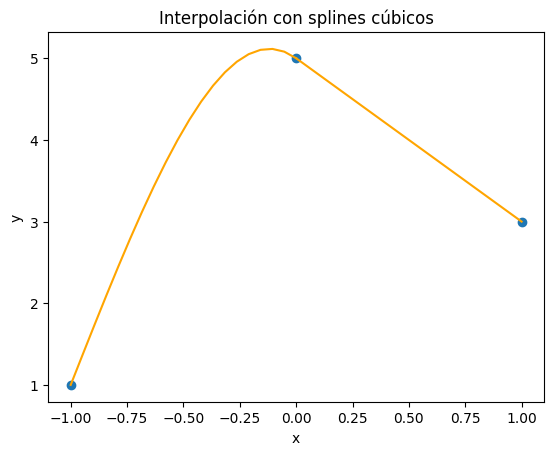

In [2]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 7, "c": 0, "d": -3},
    {"a": 5, "b": -2, "c": 0, "d": 0},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="orange")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

## 7.

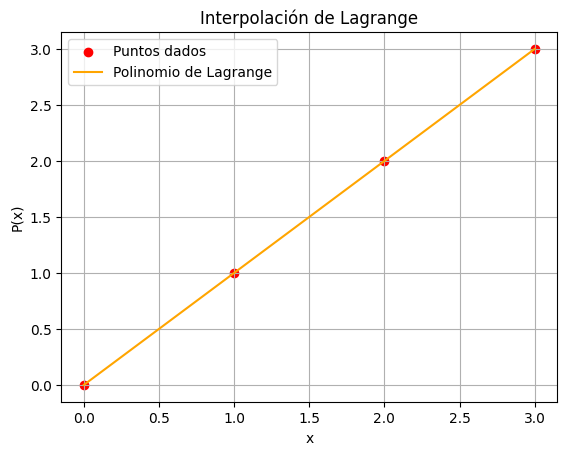

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_base(x, k, x_points):
    """
    Calcula el k-ésimo polinomio base de Lagrange L_k(x).

    :param x: Punto en el que se evalúa el polinomio base.
    :param k: Índice del polinomio base.
    :param x_points: Lista de puntos x de entrada.
    :return: Valor de L_k(x).
    """
    L_k = 1
    for i in range(len(x_points)):
        if i != k:
            L_k *= (x - x_points[i]) / (x_points[k] - x_points[i])
    return L_k

def lagrange_interpolation(x, x_points, y_points):
    """
    Interpolación de Lagrange.

    :param x: Punto en el que se evalúa el polinomio P(x).
    :param x_points: Lista de puntos x de entrada.
    :param y_points: Lista de puntos y de entrada.
    :return: Valor de P(x).
    """
    P_x = 0
    for k in range(len(x_points)):
        P_x += y_points[k] * lagrange_base(x, k, x_points)
    return P_x
# Puntos dados
x_points = [0, 1, 2, 3]
y_points = [0, 1, 2, 3]

# Generar valores interpolados
x_vals = np.linspace(min(x_points), max(x_points), 500)
y_vals = [lagrange_interpolation(x, x_points, y_points) for x in x_vals]

# Graficar los puntos y el polinomio interpolante
plt.scatter(x_points, y_points, color="red", label="Puntos dados")
plt.plot(x_vals, y_vals, label="Polinomio de Lagrange", color="orange")
plt.title("Interpolación de Lagrange")
plt.xlabel("x")
plt.ylabel("P(x)")
plt.legend()
plt.grid()
plt.show()


## 8.

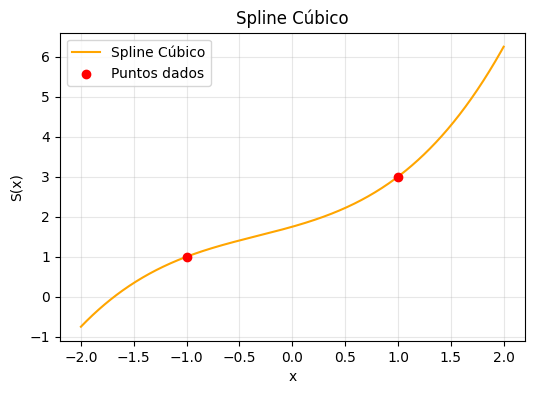

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# Definición del spline cúbico
def spline_cubico(x):
    """
    Calcula el valor del spline cúbico en el punto x.
    S(x) = 0.25 * (x + 1)^3 - 0.5 * (x + 1)^2 + 1 * (x + 1) + 1
    """
    return 0.25 * (x + 1)**3 - 0.5 * (x + 1)**2 + 1 * (x + 1) + 1
# Puntos dados
x_points = [-1, 1]
y_points = [1, 3]
# Valores de x para graficar
x_plot = np.linspace(-2, 2, 500)
y_plot = spline_cubico(x_plot)
# Crear la gráfica
plt.figure(figsize=(6,4))
plt.plot(x_plot, y_plot, label="Spline Cúbico", color="orange")
plt.scatter(x_points, y_points, color="red", label="Puntos dados", zorder=5)
plt.title("Spline Cúbico")
plt.xlabel("x")
plt.ylabel("S(x)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()